### Question 3: Do people with higher age and BMI’s have worse stages or grades of kidney cancer? 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from cci import charlson_comorbidity_idx
import json
from lifelines import KaplanMeierFitter

# Load the data
data = pd.read_json('cci_kits23.json')
data['pathology_t_stage'] = data['pathology_t_stage'].apply(lambda x: '1' if x in ['1a', '1b'] else ('2' if x in ['2a', '2b'] else x))


In [6]:
# Chi Square Test of Independence

contingency_table = pd.crosstab(data['pathology_t_stage'], data['age_at_nephrectomy']) 
# contingency_table = pd.crosstab(data['age_at_nephrectomy'], data['pathology_t_stage'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Tumor Stage")
print('Chi2:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
# print('Expected:', expected)

contingency_table = pd.crosstab(data['tumor_isup_grade'], data['age_at_nephrectomy']) 
# contingency_table = pd.crosstab(data['age_at_nephrectomy'], data['pathology_t_stage'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Tumor Grade")
print('Chi2:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
# print('Expected:', expected)


Tumor Stage
Chi2: 279.60371515851807
p-value: 0.0582996041353307
Degrees of freedom: 244
Tumor Grade
Chi2: 233.43245778226094
p-value: 0.6755033799335396
Degrees of freedom: 244


Conclusion: There is not a significant relationship between age and both tumor stage and grade with an alpha of 0.05

In [7]:
# Chi Square Test of Independence

contingency_table = pd.crosstab(data['pathology_t_stage'], data['bmi']) 
# contingency_table = pd.crosstab(data['age_at_nephrectomy'], data['pathology_t_stage'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Tumor Stage")
print('Chi2:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
# print('Expected:', expected)

contingency_table = pd.crosstab(data['tumor_isup_grade'], data['bmi']) 
# contingency_table = pd.crosstab(data['age_at_nephrectomy'], data['pathology_t_stage'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print("Tumor Grade")
print('Chi2:', chi2)
print('p-value:', p)
print('Degrees of freedom:', dof)
# print('Expected:', expected)

Tumor Stage
Chi2: 1668.0360959078203
p-value: 0.5227554041993917
Degrees of freedom: 1672
Tumor Grade
Chi2: 1688.0743645048242
p-value: 0.49491205258578874
Degrees of freedom: 1688


Conclusion: There is not a significant relationship between BMI and both tumor stage and grade with an alpha of 0.05

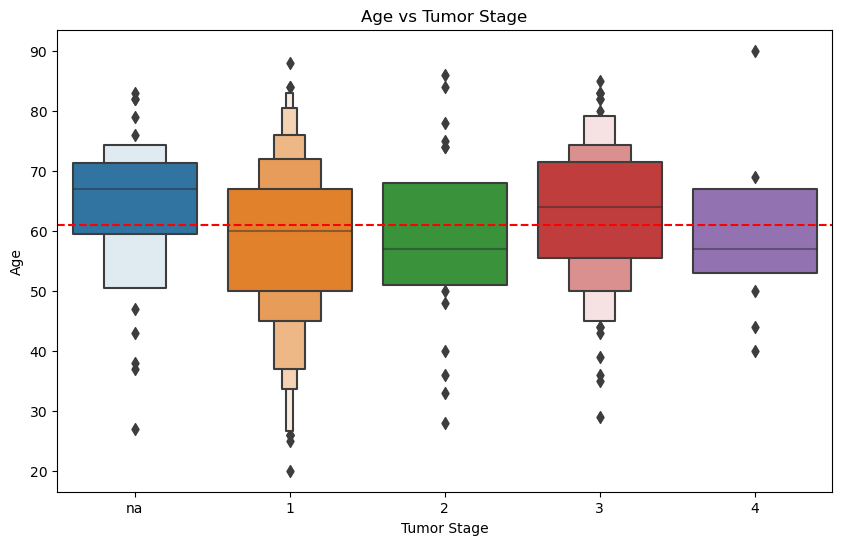

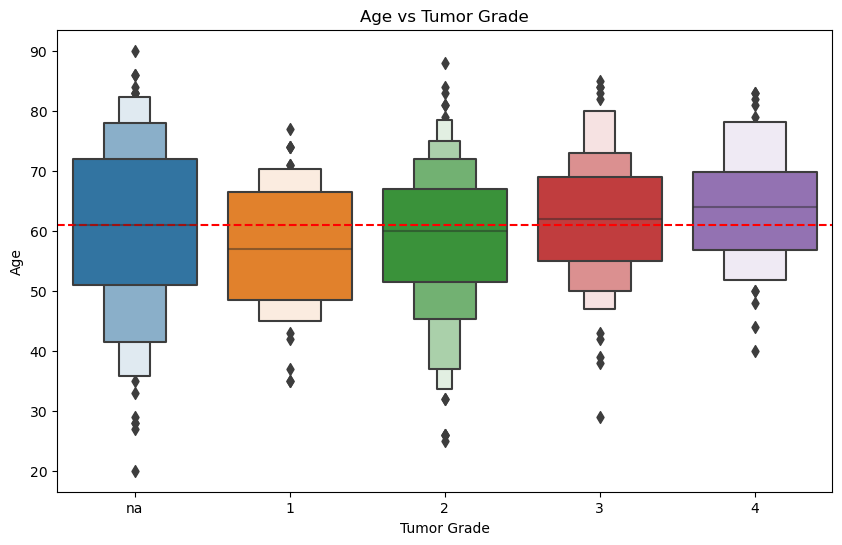

In [12]:
# Age

# Scatter Plot of age vs tumor stage
plt.figure(figsize=(10, 6))
order = ['na', '1', '2', '3', '4']

# Stage
plt.axhline(y=61, color='r', linestyle='--')
sns.boxenplot(x='pathology_t_stage', y='age_at_nephrectomy', data=data, order=order)
plt.title('Age vs Tumor Stage')
plt.xlabel('Tumor Stage')
plt.ylabel('Age')
plt.show()

# Grade
plt.figure(figsize=(10, 6))
order = ['na', '1', '2', '3', '4']
plt.axhline(y=61, color='r', linestyle='--')

sns.boxenplot(x='tumor_isup_grade', y='age_at_nephrectomy', data=data, order=order)
plt.title('Age vs Tumor Grade')
plt.xlabel('Tumor Grade')
plt.ylabel('Age')
plt.show()


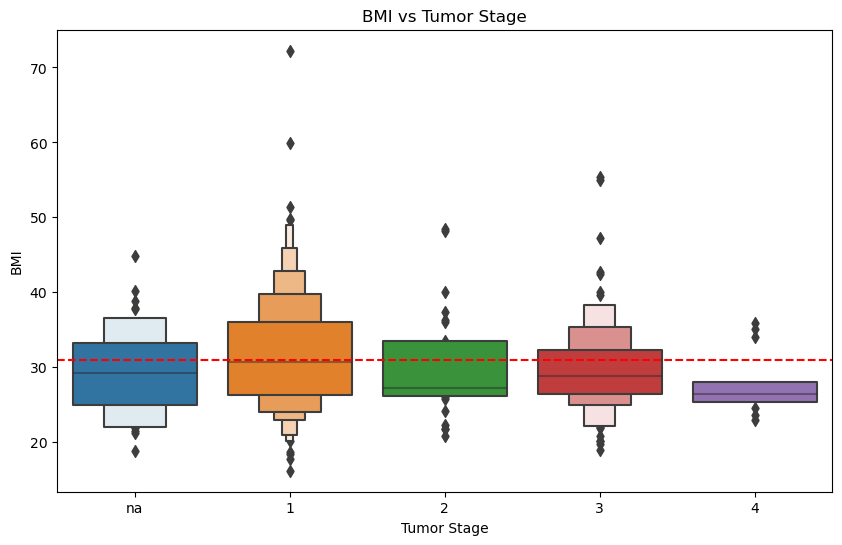

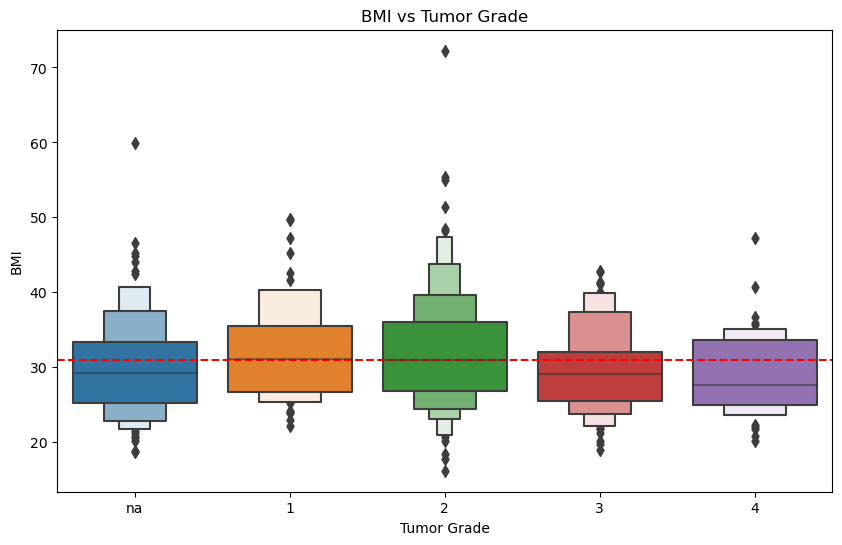

In [13]:
# BMI

# Scatter Plot of age vs tumor stage
plt.figure(figsize=(10, 6))
order = ['na', '1', '2', '3', '4']

# Stage
plt.axhline(y=30.94, color='r', linestyle='--')
sns.boxenplot(x='pathology_t_stage', y='bmi', data=data, order=order)
plt.title('BMI vs Tumor Stage')
plt.xlabel('Tumor Stage')
plt.ylabel('BMI')
plt.show()

# Grade
plt.figure(figsize=(10, 6))
order = ['na', '1', '2', '3', '4']
plt.axhline(y=30.94, color='r', linestyle='--')

sns.boxenplot(x='tumor_isup_grade', y='bmi', data=data, order=order)
plt.title('BMI vs Tumor Grade')
plt.xlabel('Tumor Grade')
plt.ylabel('BMI')
plt.show()